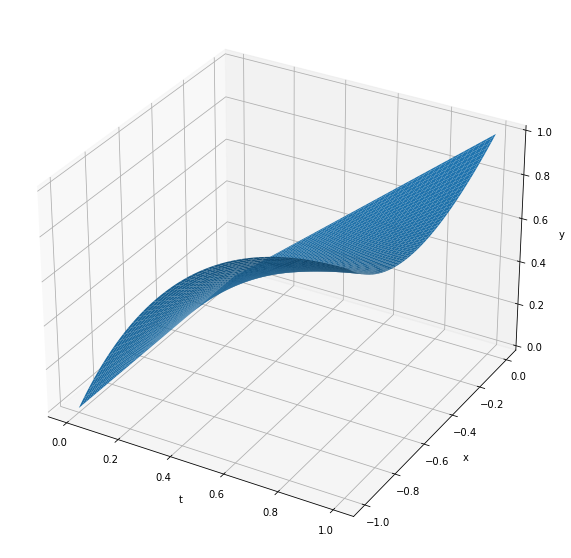

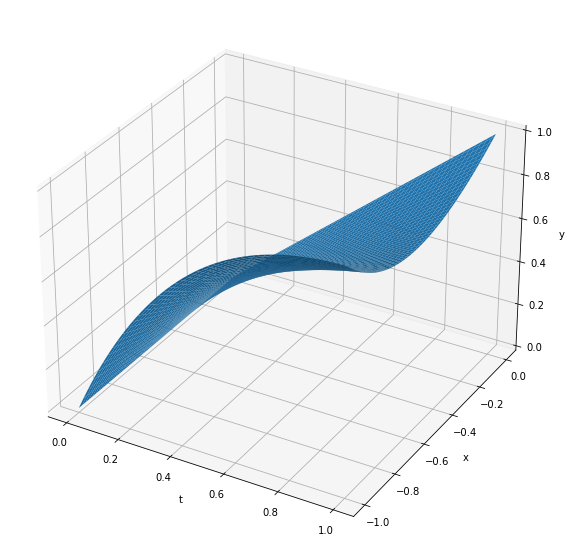

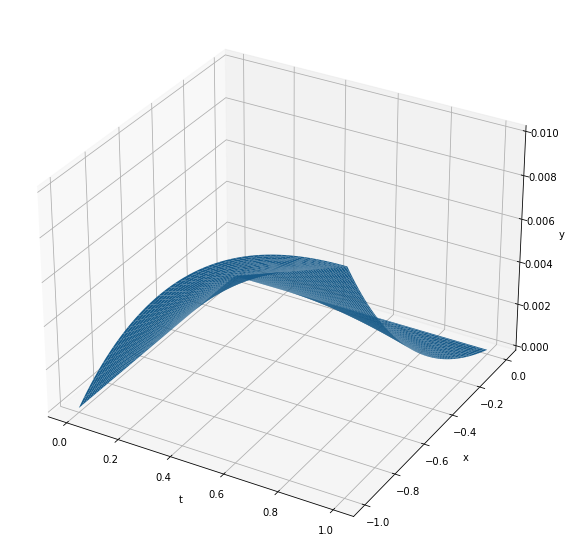

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
import math

e = 2.7182818284
N = 100
M = 100
h = 1/(N-1)
tau = 1/(M-1)

x = np.zeros(N)
t = np.zeros(M)

for i in range(N):
    x[i] = -1 + h * i
    
for j in range(M):
    t[j] = j * tau
    
y = [[0 for j in range(M)] for i in range(N)]

for i in range(N):
    y[i][0] = 0

for j in range(M):
    y[N-1][j] = t[j]
    
for j in range(M-1):
    for i in reversed(range(1,N)):
        y[i-1][j+1] = -(y[i][j+1] - y[i][j])*h/tau + y[i][j+1] + e**(-t[j+1]-x[i])*h
        
fig = plt.figure(figsize = (10, 10))
ax = fig.add_subplot(1, 1, 1, projection = '3d')
ax.set_xlabel('t')
ax.set_ylabel('x')
ax.set_zlabel('y')
t, x = np.meshgrid(t, x)
z = np.array(y)
surf = ax.plot_surface(t, x, z)  


def f(t,x):
    return (t<-x)*( t*e**(-(x+t)) )+(t>=-x)*( ( 1 - e**(-(x+t)) )*(x+t)+t*e**(-(x+t))) 

fig = plt.figure(figsize = (10, 10))
ax_1 = fig.add_subplot(1, 1, 1, projection = '3d')
ax_1.set_xlabel('t')
ax_1.set_ylabel('x')
ax_1.set_zlabel('y')
t = np.linspace(0,1,M)
x = np.linspace(-1,0,N)
t, x = np.meshgrid(t, x)
w = f(t,x)
surf_1 = ax_1.plot_surface(t, x, w)


fig = plt.figure(figsize = (10, 10))
ax_2 = fig.add_subplot(1, 1, 1, projection = '3d')
ax_2.set_xlabel('t')
ax_2.set_ylabel('x')
ax_2.set_zlabel('y')
t = np.linspace(0,1,M)
x = np.linspace(-1,0,N)
t, x = np.meshgrid(t, x)
surf_2 = ax_2.plot_surface(t, x, w - z)